<a href="https://colab.research.google.com/github/SohailKhanPAK/SP-Project/blob/main/SP_porject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xzvf "/content/drive/MyDrive/genres.tar.gz" -C "/content/"     #[run this cell to extract tar.gz files]

genres/
genres/bextract_single.mf
genres/bl.mf
genres/blues/
genres/cl.mf
genres/classical/
genres/co.mf
genres/country/
genres/di.mf
genres/disco/
genres/hi.mf
genres/hiphop/
genres/input.mf
genres/ja.mf
genres/jazz/
genres/me.mf
genres/metal/
genres/po.mf
genres/pop/
genres/re.mf
genres/reggae/
genres/ro.mf
genres/rock/
genres/rock/rock.00000.wav
genres/rock/rock.00001.wav
genres/rock/rock.00002.wav
genres/rock/rock.00003.wav
genres/rock/rock.00004.wav
genres/rock/rock.00005.wav
genres/rock/rock.00006.wav
genres/rock/rock.00007.wav
genres/rock/rock.00008.wav
genres/rock/rock.00009.wav
genres/rock/rock.00010.wav
genres/rock/rock.00011.wav
genres/rock/rock.00012.wav
genres/rock/rock.00013.wav
genres/rock/rock.00014.wav
genres/rock/rock.00015.wav
genres/rock/rock.00016.wav
genres/rock/rock.00017.wav
genres/rock/rock.00018.wav
genres/rock/rock.00019.wav
genres/rock/rock.00020.wav
genres/rock/rock.00021.wav
genres/rock/rock.00022.wav
genres/rock/rock.00023.wav
genres/rock/rock.00024.wav
g

**Import all libraries.**

In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras import layers
from keras import layers
import keras

**convert the audio files into PNG format images**

In [ ]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'/content/genres/{g}'):
        songname = f'/content/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


<Figure size 576x576 with 0 Axes>

**Sample spectrogram of a song having genre as blues.**

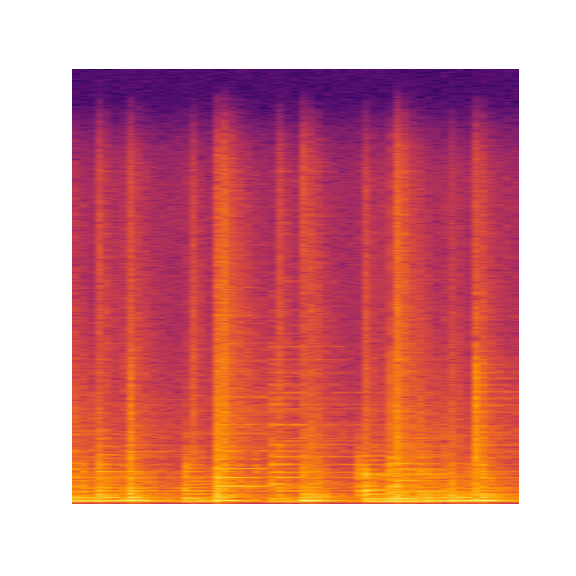

In [ ]:
from IPython.display import Image
Image('/content/img_data/blues/blues00003.png', width=400, height=350)

In [ ]:
!zip -r /content/img_data.zip /content/img_data

  adding: content/img_data/ (stored 0%)
  adding: content/img_data/classical/ (stored 0%)
  adding: content/img_data/classical/classical00047.png (deflated 1%)
  adding: content/img_data/classical/classical00049.png (deflated 1%)
  adding: content/img_data/classical/classical00029.png (deflated 1%)
  adding: content/img_data/classical/classical00062.png (deflated 1%)
  adding: content/img_data/classical/classical00050.png (deflated 1%)
  adding: content/img_data/classical/classical00086.png (deflated 1%)
  adding: content/img_data/classical/classical00027.png (deflated 1%)
  adding: content/img_data/classical/classical00014.png (deflated 1%)
  adding: content/img_data/classical/classical00081.png (deflated 1%)
  adding: content/img_data/classical/classical00037.png (deflated 1%)
  adding: content/img_data/classical/classical00030.png (deflated 1%)
  adding: content/img_data/classical/classical00009.png (deflated 1%)
  adding: content/img_data/classical/classical00032.png (deflated 1%)


**Making Headers**

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

**Extracting features from Spectrogram**

In [ ]:
import csv
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'/content/genres/{g}'):
        songname = f'/content/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

**Data preprocessing**

In [ ]:
data = pd.read_csv('dataset.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Building an ANN model**

In [ ]:
from keras.models import Sequential
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Fit the model**

In [ ]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
7/7 [==============================] - 1s 4ms/step - loss: 2.2129 - accuracy: 0.1921
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 1.8563 - accuracy: 0.3607
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 1.6462 - accuracy: 0.3769
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 1.4830 - accuracy: 0.4633
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 1.3343 - accuracy: 0.5344
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 1.2281 - accuracy: 0.5591
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 1.1438 - accuracy: 0.6216
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 1.0481 - accuracy: 0.6478
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.9880 - accuracy: 0.6728
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.9206 - accuracy: 0.6971
Epoch 11/100
7/7 [===========

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

7/7 [==============================] - 0s 3ms/step - loss: 1.4002 - accuracy: 0.6900
Accuracy: 69.00
